In [1]:
import os
import urllib
import numpy as np
from PIL import Image
from cv2 import resize
import matplotlib.pyplot as plt
import sys

import json
import tensorflow as tf
from sklearn.metrics import classification_report
from vgg16_places_365 import VGG16_Places365
sys.executable

/home/ubuntu/environments/places365/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/environments/places365/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/environments/places365/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/environments/places365/lib/pyt

'/home/ubuntu/environments/places365/bin/python'

In [2]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [3]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

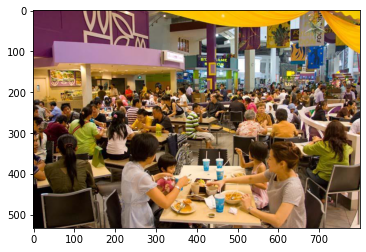

In [4]:
TEST_IMAGE_URL = 'http://places2.csail.mit.edu/imgs/demo/6.jpg'

image = Image.open(urllib.request.urlopen(TEST_IMAGE_URL))
plt.imshow(image)
image = np.array(image, dtype=np.uint8)
image = resize(image, (224, 224))

image = np.expand_dims(image, 0)

In [5]:
model = VGG16_Places365(weights='places')
# model.cuda()
predictions_to_return = 10
preds = model.predict(image)[0] # confidence score for each category
top_preds = np.argsort(preds)[::-1][0:predictions_to_return]

In [6]:
top10 = [preds[a] for a in top_preds]
print(top10)

[0.25987613, 0.22528894, 0.14122228, 0.08784049, 0.068674125, 0.064415075, 0.01966303, 0.016306411, 0.014102558, 0.011243652]


In [8]:
# load the class label
file_name = 'categories_places365.txt'
if not os.access(file_name, os.W_OK):
    synset_url = 'https://raw.githubusercontent.com/csailvision/places365/master/categories_places365.txt'
    os.system('wget ' + synset_url)
classes = list()
with open(file_name) as class_file:
    for line in class_file:
        classes.append(line.strip().split(' ')[0][3:])
classes = tuple(classes)

len(classes)

365

In [85]:
classes

('airfield',
 'airplane_cabin',
 'airport_terminal',
 'alcove',
 'alley',
 'amphitheater',
 'amusement_arcade',
 'amusement_park',
 'apartment_building/outdoor',
 'aquarium',
 'aqueduct',
 'arcade',
 'arch',
 'archaelogical_excavation',
 'archive',
 'arena/hockey',
 'arena/performance',
 'arena/rodeo',
 'army_base',
 'art_gallery',
 'art_school',
 'art_studio',
 'artists_loft',
 'assembly_line',
 'athletic_field/outdoor',
 'atrium/public',
 'attic',
 'auditorium',
 'auto_factory',
 'auto_showroom',
 'badlands',
 'bakery/shop',
 'balcony/exterior',
 'balcony/interior',
 'ball_pit',
 'ballroom',
 'bamboo_forest',
 'bank_vault',
 'banquet_hall',
 'bar',
 'barn',
 'barndoor',
 'baseball_field',
 'basement',
 'basketball_court/indoor',
 'bathroom',
 'bazaar/indoor',
 'bazaar/outdoor',
 'beach',
 'beach_house',
 'beauty_salon',
 'bedchamber',
 'bedroom',
 'beer_garden',
 'beer_hall',
 'berth',
 'biology_laboratory',
 'boardwalk',
 'boat_deck',
 'boathouse',
 'bookstore',
 'booth/indoor',
 'b

In [8]:
print('--SCENE CATEGORIES:')
# output the prediction
for i in range(0, 10):
    print(classes[top_preds[i]])

--SCENE CATEGORIES:
cafeteria
food_court
restaurant_patio
banquet_hall
restaurant
dining_hall
bazaar/outdoor
diner/outdoor
flea_market/indoor
inn/outdoor


# Extract features from images with VGG16-hybrid1365

In [9]:
import numpy as np
from PIL import Image
from cv2 import resize

from vgg16_hybrid_places_1365 import VGG16_Hybrid_1365

TEST_IMAGE_URL = 'http://places2.csail.mit.edu/imgs/demo/6.jpg'

image = Image.open(urllib.request.urlopen(TEST_IMAGE_URL))
image = np.array(image, dtype=np.uint8)
image = resize(image, (224, 224))
image = np.expand_dims(image, 0)

model = VGG16_Hybrid_1365(weights='places', include_top=False)
features = model.predict(image)
np.shape(features)

(1, 7, 7, 512)

# Validation

In [25]:
# val_path = '../places365_data/val_large/'
# val_data = os.listdir(val_path)
# model = VGG16_Places365(weights='places')
# count = 0
# val_res = {}
# for data in val_data:
#     image = Image.open(os.path.join(val_path,data)).convert('RGB')
# #     plt.imshow(image)
#     image = np.array(image, dtype=np.uint8)
#     image = resize(image, (224, 224))
#     image = np.expand_dims(image, 0)
#     predictions_to_return = 10
#     preds = model.predict(image)[0] # confidence score for each category
#     name = data[10:-4]
#     val_res [name] = preds    
# #     top_preds = np.argsort(preds)[::-1][0:predictions_to_return]
#     if count%1000 ==0:
#         print(count)
#     count+=1

# print('total {} samples'.format(len(val_res.keys())))

# with open('val_results.json', 'w') as f:
#     json.dump(val_res, f, sort_keys=True, indent=4)

In [28]:
# read the ground truth
# load the class label
file_name = 'categories_places365.txt'
if not os.access(file_name, os.W_OK):
    synset_url = 'https://raw.githubusercontent.com/csailvision/places365/master/categories_places365.txt'
    os.system('wget ' + synset_url)
classes = list()
with open(file_name) as class_file:
    for line in class_file:
        classes.append(line.strip().split(' ')[0][3:])
classes = tuple(classes)

with open ('../places365_data/annotations/places365_val.txt','r') as f:
    gts = f.readlines()
gts_x = [i.split()[0][10:-4] for i in gts]
gts_y = [i.split()[1] for i in gts]
gts = {}
for i in range(len(gts_x)):
    gts[gts_x[i]] = gts_y[i]
    
# read val_results
with open ('val_results.json', 'r') as f:
    val_results = json.load(f)
for key in val_results.keys():
    val_results[key] = np.array(val_results[key])
gt = [int(a) for a in list(gts.values())]
dt = []
predictions_to_return = 5
for key in val_results.keys():
    preds = val_results[key]
    top_preds = np.argsort(preds)[::-1][0:predictions_to_return]
    dt.append(top_preds.tolist())


In [33]:
# top-1 accuracy:
from sklearn.metrics import accuracy_score
target_names = classes
y_true = [a for a in gt]
y_pred = [a[0] for a in dt]
print('accuracy score is {}'.format(accuracy_score(y_true, y_pred)))
print(classification_report(y_true, y_pred, target_names=target_names))
print('accuracy score is {}'.format(accuracy_score(y_true, y_pred)))
# print('Top-1 accuracy is {}'.format(float(accurate/total)))

accuracy score is 0.33101369863013697
                            precision    recall  f1-score   support

                  airfield       0.58      0.19      0.29       100
            airplane_cabin       0.45      0.82      0.58       100
          airport_terminal       0.10      0.35      0.16       100
                    alcove       0.38      0.23      0.29       100
                     alley       0.45      0.33      0.38       100
              amphitheater       0.55      0.47      0.51       100
          amusement_arcade       0.74      0.39      0.51       100
            amusement_park       0.38      0.34      0.36       100
apartment_building/outdoor       0.26      0.32      0.29       100
                  aquarium       0.20      0.36      0.26       100
                  aqueduct       0.48      0.56      0.52       100
                    arcade       0.43      0.39      0.41       100
                      arch       0.22      0.20      0.21       100
  archael

/home/ubuntu/environments/places365/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
# Top-N accuracy
total = 0
accurate = 0
top_1 = 0
for i in range(len(dt)):
    for a in range(len(dt[i])):
        if a ==0:
            if dt[i][a] == gt[i]:
                accurate +=1
                top_1 += 1
                break
        else:
            if dt[i][a] == gt[i]:
                accurate +=1
                break
    total+=1
print('Top-1 accuracy is {}'.format(float(top_1/total)))
print('Top-{} accuracy is {}'.format(predictions_to_return,float(accurate/total)))

Top-1 accuracy is 0.33101369863013697
Top-5 accuracy is 0.6265479452054794


# Level-1

In [9]:
gt_max = 0
gt_min = 10


    if i[0]>gt_max:
        gt_max = i[0]
    if i[0]<gt_min:
        gt_min = i[0]
print(gt_max,gt_min)

364 0


In [46]:
import csv
level1 = {}
with open('places365_level1.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        level1[int(row[0])]=[int(row[1]),int(row[2]),int(row[3])]    
        
def convert2level1(sample):
    new = []
    for i in sample:
        new.append(level1[i])
    return new
    

In [58]:
gt_level1 = convert2level1(gt)

dt_level1 = []
for i in dt:
    new = convert2level1([i[0]])
    dt_level1.append(new)
print(gt_level1[0],dt_level1[0])

[1, 0, 0] [[0, 0, 1]]


In [64]:
def level1_evaluate(gt,dt):
    count = 0
    accurate = 0
    for i in range(len(dt)):
        if gt[i] == dt[i][0]:
            accurate += 1
        count += 1
    accuracy = float (accurate / count)
    return accuracy
print('Top-1 accuracy is {}'.format(level1_evaluate(gt_level1,dt_level1)))

Top-1 accuracy is 0.8112876712328767


# Level-2

In [72]:
import csv
level2 = {}
with open('places365_level2.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        level2[int(row[0])]=[row[a] for a in range(1,len(row))]
        
def convert2level2(sample):
    new = []
    for i in sample:
        new.append(level2[i])
    return new
    

In [73]:
gt_level2 = convert2level2(gt)

dt_level2 = []
for i in dt:
    new = convert2level2([i[0]])
    dt_level2.append(new)
print(gt_level2[0],dt_level2[0])

['0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'] [['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1']]


In [74]:
def level2_evaluate(gt,dt):
    count = 0
    accurate = 0
    for i in range(len(dt)):
        if gt[i] == dt[i][0]:
            accurate += 1
        count += 1
    accuracy = float (accurate / count)
    return accuracy
print('Top-1 accuracy is {}'.format(level2_evaluate(gt_level2,dt_level2)))

Top-1 accuracy is 0.5347945205479452
